<a href="https://colab.research.google.com/github/Basy-Duke/Basy-Duke/blob/main/BASY_LINEAR_REGRESSION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A LINEAR REGRESSION MODEL TO PREDICT HOUSE PRICES IN LAGOS

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [252]:
df = pd.read_csv('/content/drive/MyDrive/crib (1).csv')

In [253]:
df.shape

(10157, 17)

# Initial Data Inspection

In [257]:
df.head()

,Property Ref,Added On,Last Updated,Market Status,Type,Bedrooms,Bathrooms,Toilets,Parking Spaces,Furnishing,Price,District,State,Servicing,Service Charge,Total Area,Covered Area
0,2619053,13 Dec 2024,27 Mar 2025,Available,House,3.0,3.0,4.0,1.0,Furnished,110000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
1,2674076,21 Jan 2025,15 Apr 2025,Available,Terraced Duplex,4.0,4.0,5.0,3.0,NaN,530000000.0,Victoria Island (VI),Lagos,Serviced,NaN,NaN,NaN
2,2820608,15 Apr 2025,15 Apr 2025,Available,Semi-detached Duplex,5.0,7.0,6.0,4.0,NaN,850000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
3,2820575,15 Apr 2025,15 Apr 2025,Available,Detached Duplex,5.0,5.0,6.0,5.0,NaN,450000000.0,Lekki,Lagos,NaN,NaN,NaN,NaN
4,2790291,27 Mar 2025,15 Apr 2025,Available,Detached Duplex,4.0,4.0,5.0,3.0,NaN,250000000.0,Lekki,Lagos,Serviced,NaN,NaN,NaN


In [258]:
df = df.drop(columns=['Property Ref', 'Added On', 'Last Updated', 'Market Status', 'Service Charge'])

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10157 entries, 0 to 10156
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            10157 non-null  object 
 1   Bedrooms        10061 non-null  float64
 2   Bathrooms       9089 non-null   float64
 3   Toilets         9297 non-null   float64
 4   Parking Spaces  5705 non-null   float64
 5   Furnishing      756 non-null    object 
 6   Price           10157 non-null  float64
 7   District        10157 non-null  object 
 8   State           10157 non-null  object 
 9   Servicing       744 non-null    object 
 10  Total Area      2086 non-null   object 
 11  Covered Area    1636 non-null   object 
dtypes: float64(5), object(7)
memory usage: 952.3+ KB


In [260]:
df.describe()

,Bedrooms,Bathrooms,Toilets,Parking Spaces,Price
count,10061.000000,9089.000000,9297.000000,5705.000000,1.015700e+04
mean,4.372826,4.487182,5.325696,7.133918,1.646746e+09
std,2.166722,2.041513,3.006802,61.893916,5.976922e+10
min,1.000000,1.000000,1.000000,1.000000,1.700000e+05
25%,4.000000,4.000000,5.000000,3.000000,1.500000e+08
50%,4.000000,4.000000,5.000000,4.000000,2.700000e+08
75%,5.000000,5.000000,6.000000,5.000000,4.500000e+08
max,111.000000,51.000000,112.000000,1600.000000,5.606614e+12


In [215]:
df.isnull().sum()

,0
Type,0
Bedrooms,96
Bathrooms,1068
Toilets,860
Parking Spaces,4452
Furnishing,9401
Price,0
District,0
State,0
Servicing,9413


#  Handle Missing Data (if any)

In [249]:
df.dropna(inplace=True)

In [248]:
df.shape

(11, 10)

# Convert price and area-related columns to numeric

In [218]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [219]:
df['Total Area'] = df['Total Area'].str.replace(",", "").str.extract('(\d+)').astype(float)

In [220]:
df['Covered Area'] = df['Covered Area'].str.replace(",", "").str.extract('(\d+)').astype(float)

# Fill missing values

In [221]:
numerical_cols = ['Bedrooms', 'Bathrooms', 'Toilets', 'Parking Spaces', 'Total Area', 'Covered Area']

In [222]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [223]:
df['Furnishing'] = df['Furnishing'].fillna('Unfurnished')

In [224]:
df['Servicing'] = df['Servicing'].fillna('Unserviced')

# Drop rows with missing target (Price)

#  Feature Encoding

In [246]:
categorical_cols = ['Type', 'Furnishing', 'District', 'State', 'Servicing']

In [261]:
df = df.dropna(subset=['Price'])
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features and target

In [242]:
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Train-test split

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train the model

In [229]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()


# Evaluate the model

In [241]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²: {r2:.4f}")


Model Evaluation:
MAE: 132,257,762.44
RMSE: 229,077,164.25
R²: 0.9402



# Optional: Visualize predictions vs actual

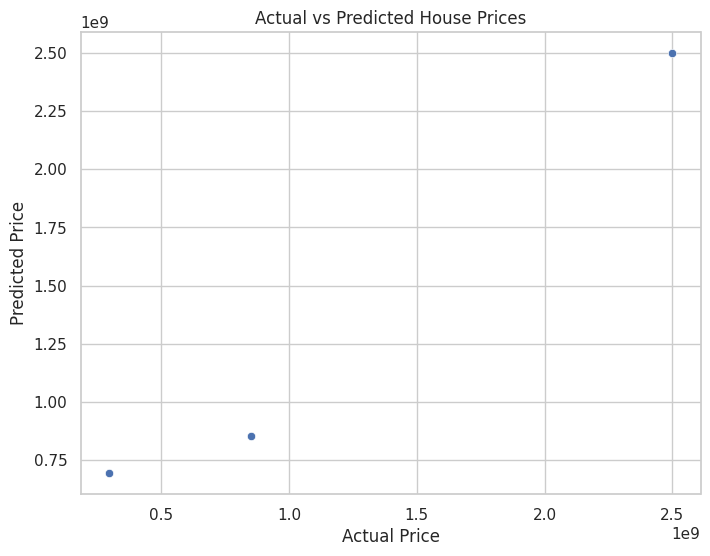

In [240]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

# Make predictions

In [236]:
y_pred = model.predict(X_test)

#  Encode Categorical Variables

In [239]:
df = pd.get_dummies(df, drop_first=True)

#  Correlation Matrix (EDA)

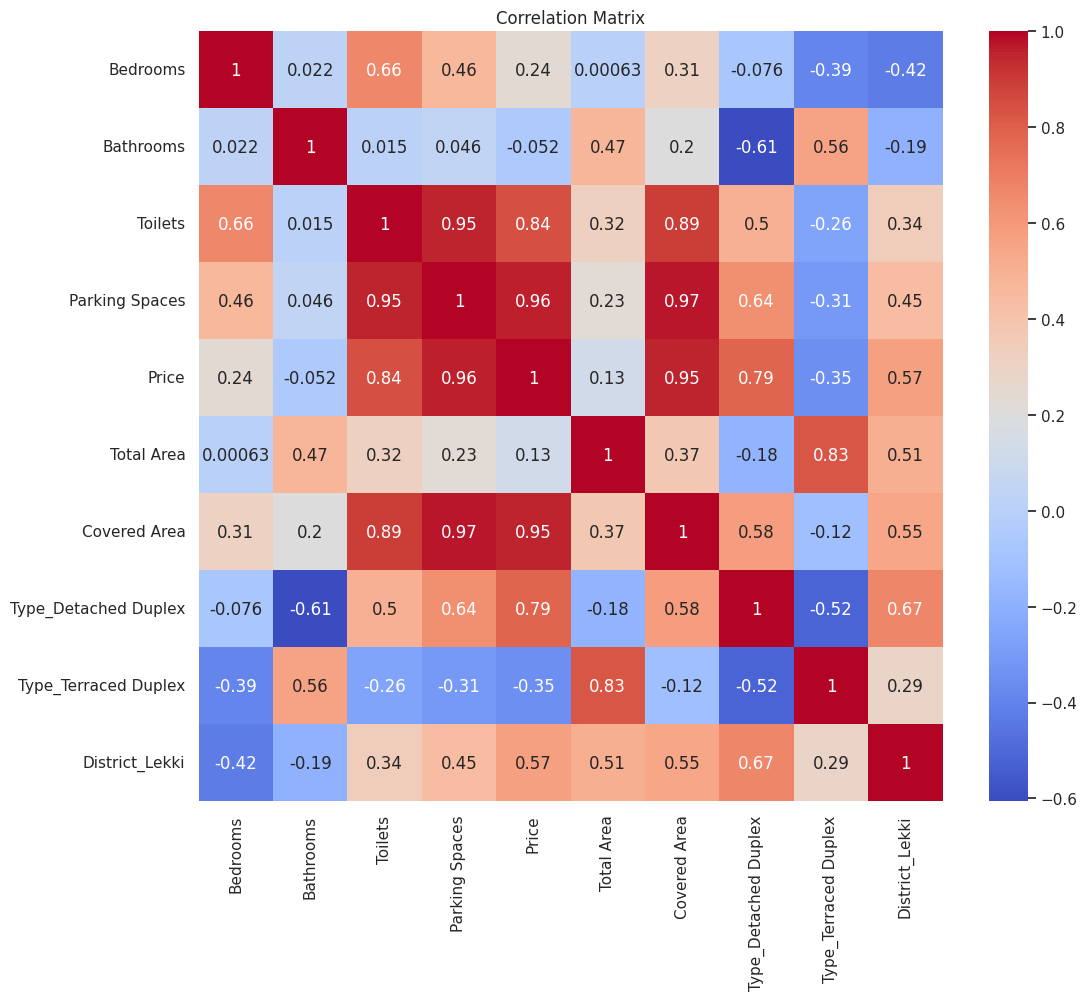

In [238]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#  Feature and Target Selection
#  Predicting Price

In [262]:
X = df.drop('Price', axis=1)  # Features
y = df['Price']               # Target

#  Split Dataset into Training and Test Sets


In [263]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Initialize and Train Linear Regression Model


# Drop rows with missing Price

In [264]:
df = df[df['Price'].notnull()]

# Initialize and train model

In [268]:
# (X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42))

# Create a DataFrame of coefficients

In [267]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)


ValueError: All arrays must be of the same length

# Plot top positive and negative features

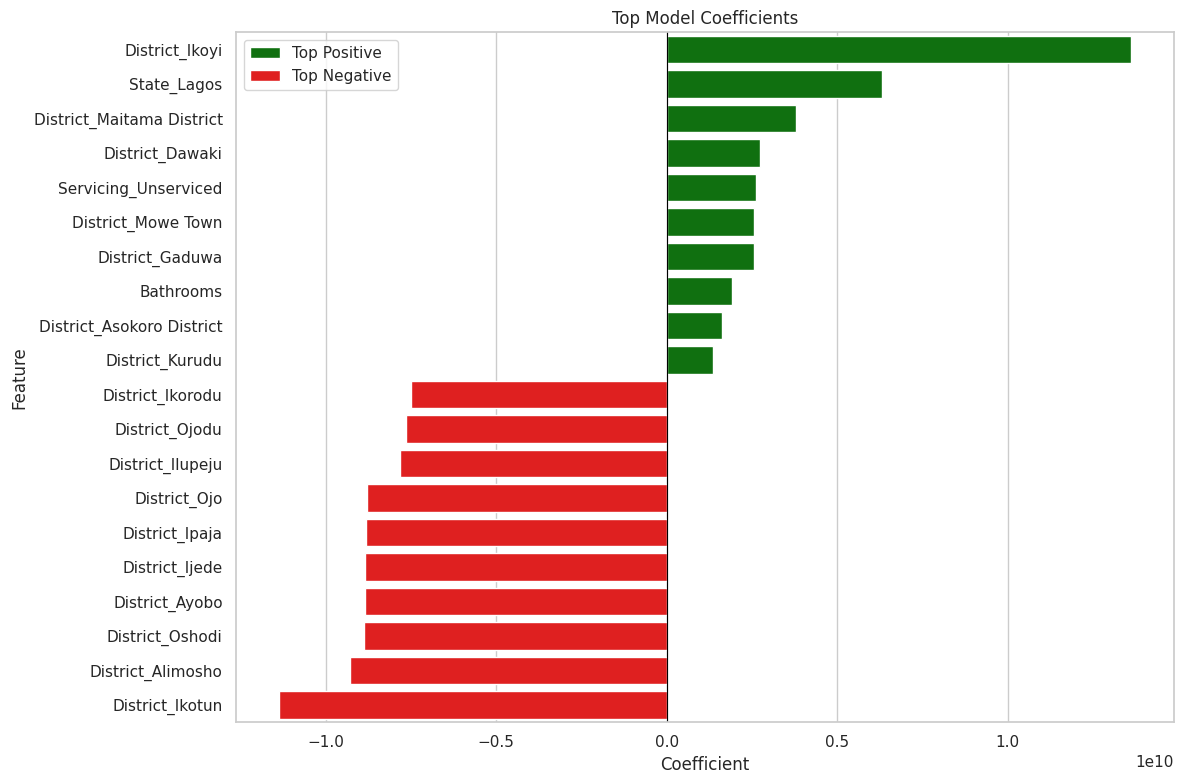

In [269]:
plt.figure(figsize=(12, 8))
sns.barplot(data=coef_df.head(10), x='Coefficient', y='Feature', color='green', label='Top Positive')
sns.barplot(data=coef_df.tail(10), x='Coefficient', y='Feature', color='red', label='Top Negative')
plt.title('Top Model Coefficients')
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

from sklearn.inspection import permutation_importance
# Compute permutation importance



# Plot

In [276]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
results = permutation_importance(model, X_test, y_test, scoring='r2', n_repeats=10, random_state=42)

# Plot
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': results.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(15), x='Importance', y='Feature')
plt.title("Permutation Importance (Top 15 Features)")
plt.tight_layout()
plt.show()

ValueError: All arrays must be of the same length

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style

In [277]:
sns.set(style="whitegrid")

# Create scatter plot

<Axes: xlabel='Price'>

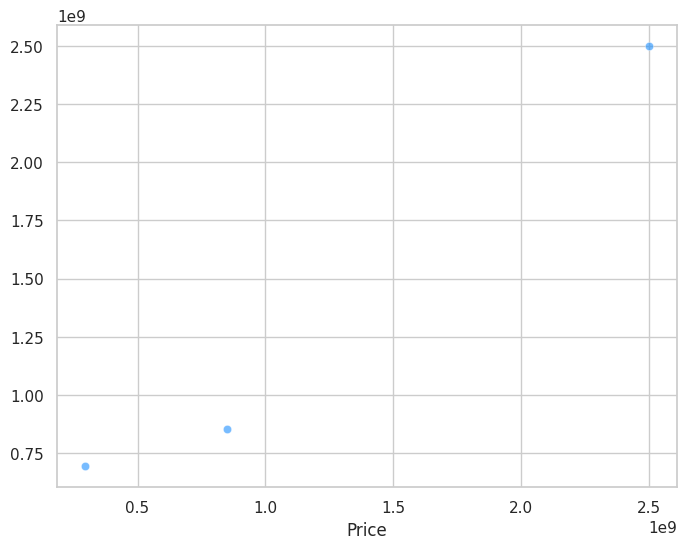

In [273]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='dodgerblue')


# Plot perfect prediction line

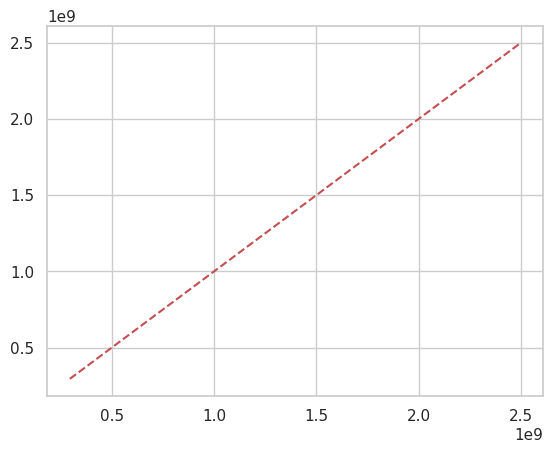

In [274]:
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Labels and title

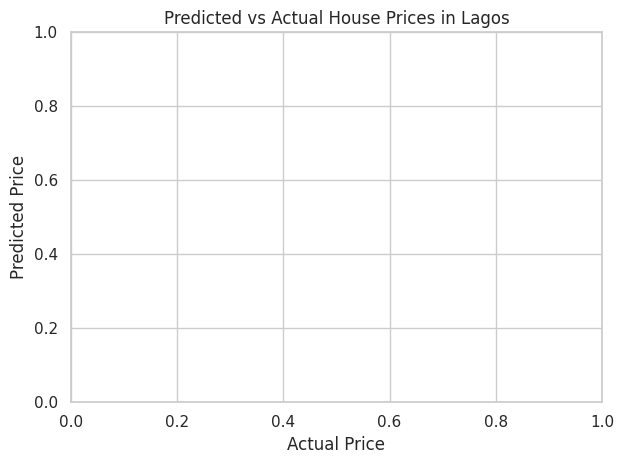

In [275]:
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs Actual House Prices in Lagos')
plt.tight_layout()
plt.show()